# Welcome to Week 1: Graphs

In this week's programming exercise, you will be working on implementing a Graph class in Python. Throughout the exercise, you will be extending the class Graph by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercise, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the customMagic.py nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

This exercise is given as a Jupyter notebook, you might run this in your browser by starting a notebook server or through VScode (PyCharm only allows for read-only mode for jupyter notebooks, unless you have Pycharm-pro which is a paid version or you need a student license). The simplest way to [install jupyter](https://docs.jupyter.org/en/latest/install/notebook-classic.html) notebooks is by installing [Anaconda](https://docs.anaconda.com/free/anaconda/install/), a custom python distribution and packagemanager used for Data Science. If you do not want to install all of Anaconda you can also install jupyter via pip: ``pip3 install jupyter``(`pip3` or `pip` will work depending on how you installed python3). You can find a tutorial for running the notebook [here](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html). With VScode the IDE should guide you in installing the correct packages. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOUR STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics
get_ipython().register_magics(CustomMagics)

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
%%execwritefile exercise1_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

Writing exercise1_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [6, 4]

# 1.0 Graph

The following code outlines the basics of a Graph class. Study how this class works, and ensure you thoroughly study the docstrings to get a clear idea of how the class is intended to be implemented. 

Your task is to complete the `add_vertex` and `add_edge` class methods.

In [5]:
%%execwritefile exercise1_{student}_notebook.py 1 -a

class Graph():
    """
    This is a class implementing a Graph.
    The internal representation of this class is an adjacency list.
    With set_adjacency_matrix and set_adjacency_list a graph can be retrieved with both representations.
    However, the internal representation stays an adjacency list.

    Attributes:
        :param self.adjacency_list: This contains a dict with as keys the name of the vertices
                               and as values their edges to other vertices.
        :type self.adjacency_list: dict[int/str, set[int/str]]
    """
    def __init__(self):
        """
        This initializes the graph.
        Note that this creates an empty graph.
        """
        self.adjacency_list = {}

    def add_vertex(self, vertex):
        """
        This adds a vertex to the graph.
        
        :param vertex: This is the name of the vertex
        :type vertex: int or str
        """
        if vertex in self.adjacency_list:
            raise ValueError(f"The vertex name {vertex} already exist")
            
        self.adjacency_list[vertex] = set()


    def add_edge(self, source, destination):
        """
        This adds an edge to the graph.

        :param source: This is the name of the vertex where the edge comes from.
        :type source: int or str
        :param destination: This is the name of the vertex where the edge goes to.
        :type destination: int or str
        """
        if source not in self.adjacency_list:
            raise ValueError(f"The vertex name {source} does not exist in the graph")
        if destination not in self.adjacency_list:
            raise ValueError(f"The vertex name {destination} does not exist in the graph")

        self.adjacency_list[source].add(destination)

    def set_adjacency_list(self, adjacency_list):
        """
        This uses the input to adjacency_list to set the graph.
        This overwrites the current graph.

        :param adjacency_list: This contains a dict with as keys the name of the vertices
                               and as values their edges to other vertices.
        :type adjacency_list: dict[int/str, set[int/str]]
        """
        # Check the new graph for consistency (no edges to non-existing vertices).
        for source, edges in adjacency_list.items():
            for dest in edges:
                if dest not in adjacency_list.keys():
                    raise ValueError(f"The vertex {dest} does not exist in the graph with vertices: {list(adjacency_list.keys())}")

            self.adjacency_list[source] = set(edges)

    def get_adjacency_list(self):
        """
        This method returns the adjacency list, which is the internal representation of the graph.

        :return: A dictionary containing the adjacency_list
        :rtype: dict[int/str, set[int/str]]
        """
        return self.adjacency_list

Appending to exercise1_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `add_vertex` and `add_edge` works as intended.
To do this create a ``Graph`` object, add vertices and edges and then use the ``get_adjacency_list`` to verify that your implementation works correctly.

In [6]:

graph_example = Graph()
graph_example.set_adjacency_list({3: [3, 1], 1: [], 2: [3, 1]})
print(graph_example.get_adjacency_list())
graph_example.add_vertex("B")
graph_example.add_edge("B", 1)
graph_example.add_edge(3, "B")

graph_example.get_adjacency_list()

{3: {1, 3}, 1: set(), 2: {1, 3}}


{3: {1, 3, 'B'}, 1: set(), 2: {1, 3}, 'B': {1}}

## 1.1 Adjacency matrix representation

We continue the work of building the Graph implementation. Initially, the class implements an adjacency list representation of a ``Graph``-object. In this exercise, you are tasked to implement the static method ``list_to_matrix``. This method should take as input the adjacency list representation of a ``Graph``-object and return a *2D numpy array* representing the same graph.  

Think about why a static method is used instead of a class method. What would need to change in order to implement it as a class method? If you are confused about the distinction between static- and class methods see e.g. [this resource](https://stackoverflow.com/questions/136097/what-is-the-difference-between-staticmethod-and-classmethod-in-python)

For your convenience, we have added a way to visualize the graph of a ``Graph``-object via the ``show()`` method. 

In [7]:
%%execwritefile exercise1_{student}_notebook.py 2 -a -c

class Graph(Graph):
    def get_adjacency_matrix(self):
        """
        This method returns an adjacency matrix representation of the graph.

        :return: A 2D numpy array containing the adjacency matrix
        :rtype: np.ndarray[int]
        """
        return Graph.list_to_matrix(self.adjacency_list)

    @staticmethod
    def list_to_matrix(adjacency_list):
        """
        This static method transforms an adjacency list into an adjacency matrix.

        :param adjacency_list: An adjacency list representing a graph.
        :type adjacency_list: dict[int/str, set[int/str]]
        :return: A 2D numpy array containing the adjacency matrix
        :rtype: np.ndarray[bool]
        """
        vertices = list(adjacency_list.keys())
        matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
        for i, vertex in enumerate(vertices):
            for edge in adjacency_list[vertex]:
                j = vertices.index(edge)
                matrix[i, j] = 1
        return matrix
    
    def show(self):
        """
        This method shows the current graph.
        """
        graph = nx.from_numpy_array(self.get_adjacency_matrix(), create_using=nx.DiGraph)
        nx.draw_shell(graph,
                      labels=dict(enumerate(self.adjacency_list.keys())),
                      with_labels=True,
                      node_size=500,
                      width=2,
                      arrowsize=20)
        plt.show()

Appending to exercise1_3893995_notebook.py


## Test your code

Here you can test your code. One way to validate your implementation is to create a graph object and ensure that ``get_adjacency_matrix``, ``get_adjacency_list``, and the visualization all align. To visualize simply call the class method ``show()`` on a Graph object. 


{3: {1, 3}, 1: set(), 2: {1, 3}}
[[1 1 0]
 [0 0 0]
 [1 1 0]]


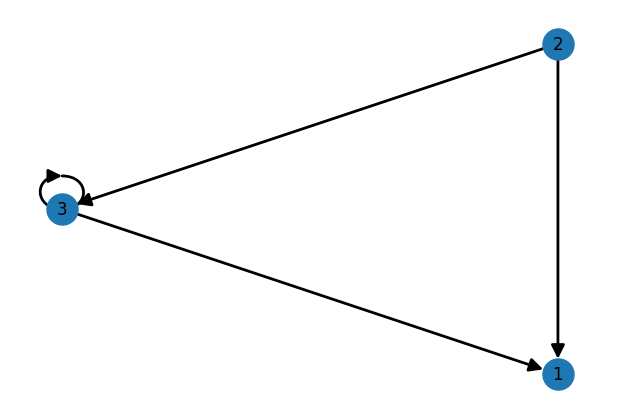

In [8]:
G = Graph()
G.set_adjacency_list({3: [3, 1], 1: [], 2: [3, 1]})
print(G.get_adjacency_list())
print(G.get_adjacency_matrix())
G.show()


## 1.2 Update with adjacency matrix

Now that we've added a way to obtain an adj. matrix representation a natural next step is to extend the class further to allow a way to update a ``Graph``-object with an adj. matrix. Your task is to implement ``matrix_to_list`` 

In [9]:
%%execwritefile exercise1_{student}_notebook.py 3 -a -c

class Graph(Graph):
    def set_adjacency_matrix(self, adjacency_matrix):
        """
        This class method expects an adjacency matrix as input, it then updates the Graph's internal
        adjacency list which updates the Graph. Note that this will overwrite the current Graph.

        :param adjacency_matrix: This contains the adjacency matrix.
        :type adjacency_matrix: np.ndarray[int]
        """
        adjacency_list = Graph.matrix_to_list(adjacency_matrix)
        self.set_adjacency_list(adjacency_list)

    @staticmethod
    def matrix_to_list(adjacency_matrix):
        """
        This static method transforms an adjacency matrix into an adjacency list.

        :param adjacency_matrix: A 2D numpy array containing the adjacency matrix
        :type adjacency_matrix: np.ndarray[int]
        :return: An adjacency list representing a graph.
        :rtype: dict[int, set[int]]
        """
        adjacency_list = {}
        for i, row in enumerate(adjacency_matrix):
            adjacency_list[i] = set(np.where(row == 1)[0])
        return adjacency_list

Appending to exercise1_3893995_notebook.py


## Test your code

Use the cell below to test your code. Check if ``matrix_to_list`` works as intended.

A way to test would be to create a Graph object which is then updated with the new ``set_adjacency_matrix``-method and later inspeceted it with the ``show()``-method. You might also validate your work by printing the adjacency matrix using ``get_adjacency_matrix``.

{0: {1}, 1: {4}, 2: {0}, 3: {0, 3}, 4: {2, 4}}
[[0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 1 0 1]]


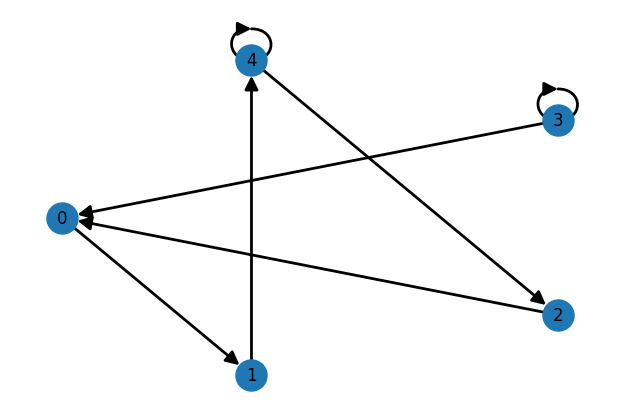

In [10]:
G = Graph()
G.set_adjacency_matrix(np.random.choice([0, 1], size=(5,5), p=[0.7, 0.3]))
print(G.get_adjacency_list())
print(G.get_adjacency_matrix())
G.show()


## 1.3 Added functionality for the Graph-class

In some  The graph class can now also return the undirected variant of the current graph. 

In [11]:
%%execwritefile exercise1_{student}_notebook.py 4 -a -c

class Graph(Graph):
    def to_undirected_graph(self):
        """
        This method returns the undirected graph based on the direct graph (self).

        :return: This returns a graph object which is undirected.
        :rtype: Graph
        """
        undirected_graph = copy.deepcopy(self)
        for vertex, edges in self.adjacency_list.items():
            for edge in edges:
                undirected_graph.add_edge(edge, vertex)
        return undirected_graph

Appending to exercise1_3893995_notebook.py


## Test your code

Use the cell below to test your code, and validate that  ``to_undirected_graph`` works as intended.


You can do this by 1) creating a Graph object and show it, 2) apply ``to_undirected_graph`` to make an undirected version of the same graph and show it as well.

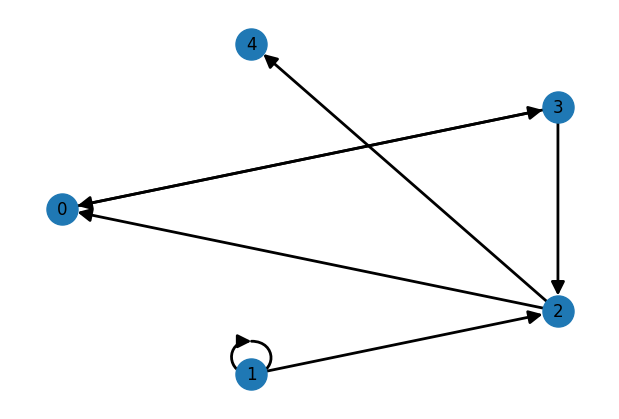

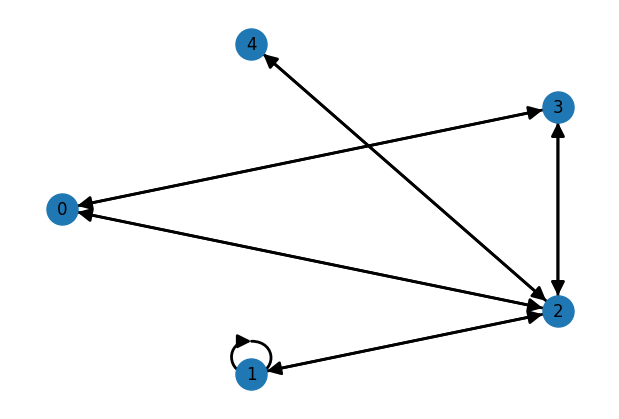

In [12]:
G = Graph()
G.set_adjacency_matrix(np.random.choice([0, 1], size=(5,5), p=[0.7, 0.3]))
G.show()
G.to_undirected_graph().show()

## 1.4 Add method to the Graph class.

Provide an implementation for exercise 3 from the Problem Set. That is, provide an implementation of your pseudocode algorithm that verifies whether an undirected graph contains at most two vertices with an odd number of neighbours. Make sure you finish [1.3](#1.3-Added-functionality-for-the-Graph-class) before attempting this exercise.

In [13]:
%%execwritefile exercise1_{student}_notebook.py 5 -a -c

class Graph(Graph):
    def has_two_or_less_odd_vertices(self):
        """
        This method determines if an undirected graph has at most two vertices with an odd number of neighbours.
        
        Any graph can be used but should first be converted into a undirected graph, 
        which is already given in the code below.
        
        Note that a reflexive edge, i.e. an edge that connects a vertex to itself, should be ignored. 
        For example the partial adjacency list: `4: {4, 2, 1}` has an even number of neighbours.
        
        :return: True if graph contains at most two vertices with odd number of neighbours, False otherwise.
        :rtype: bool
        """
        g = self.to_undirected_graph()
        odd_vertices = 0
        for vertex, edges in g.adjacency_list.items():
            if len(edges) % 2 == 1 and vertex not in edges:
                odd_vertices += 1
        return odd_vertices <= 2

Appending to exercise1_3893995_notebook.py


## Test your code
Use the cell below to check if ``count_odd_vertices`` works as intended.

True


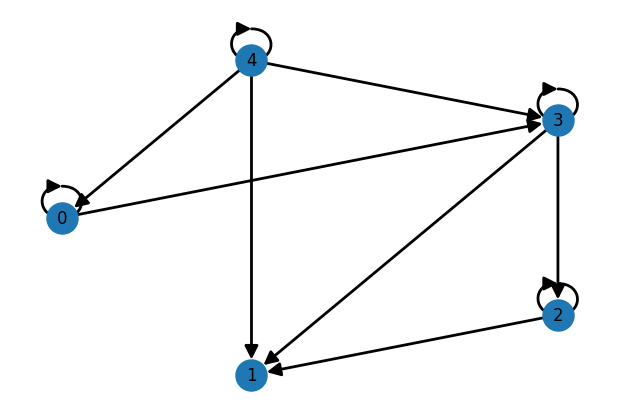

In [14]:
G = Graph()
G.set_adjacency_matrix(np.random.choice([0, 1], size=(5,5), p=[0.7, 0.3]))
print(G.has_two_or_less_odd_vertices())
G.show()


## 1.5 Invert edges 

Implement your pseudocode algorithm for inverting all the edges of a directed graph by completing the ``invert_edges`` method. 

In [15]:
%%execwritefile exercise1_{student}_notebook.py 6 -a -c

class Graph(Graph):
    def invert_edges(self):
        """
        This method inverts all edges of a graph.

        Note, that inverting the edges of an undirected graph returns the same graph.
        
        :return: A new graph with the edge inverted.
        :rtype: Graph
        """
        inverted_graph = copy.deepcopy(self)
        for vertex, edges in self.adjacency_list.items():
            for edge in edges:
                inverted_graph.add_edge(edge, vertex)
        return inverted_graph

Appending to exercise1_3893995_notebook.py


## Test your code
Use the cell below to check that ``invert_edges`` works as intended.

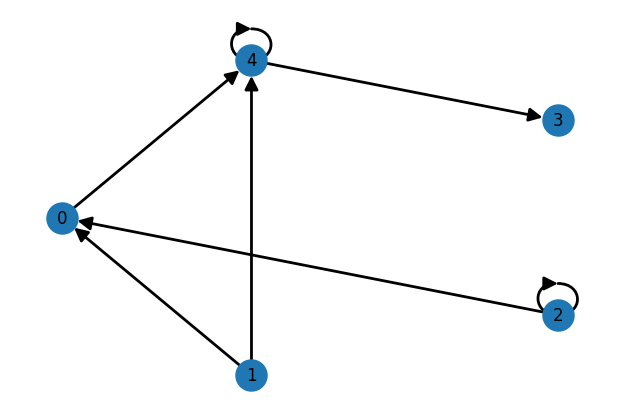

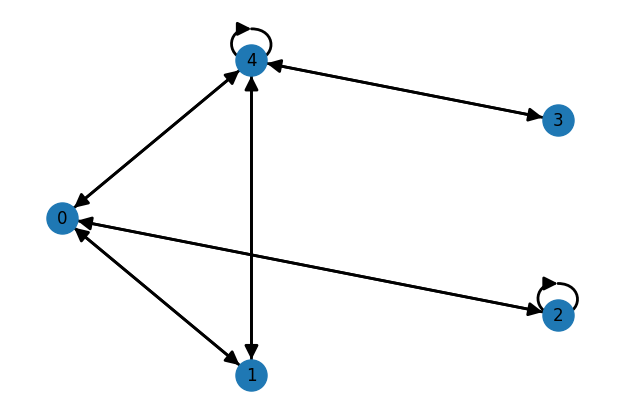

In [16]:
G = Graph()
G.set_adjacency_matrix(np.random.choice([0, 1], size=(5,5), p=[0.7, 0.3]))
G2 = G.invert_edges()
G.show()
G2.show()


# 2.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise1_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise1_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise1_{student}.py"**. Now, you can adjust the **"exercise1_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.